## Importing Data

In [12]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

with open('./data.pkl', 'rb') as fid:
    data = pk.load(fid) ## dictionary

print(data.keys())
print(data['sampling_freq_Hz'])

dict_keys(['signal', 'noise', 'noisy_sine_one', 'noisy_sine_two', 'sampling_freq_Hz'])
200


## Visualizing Data

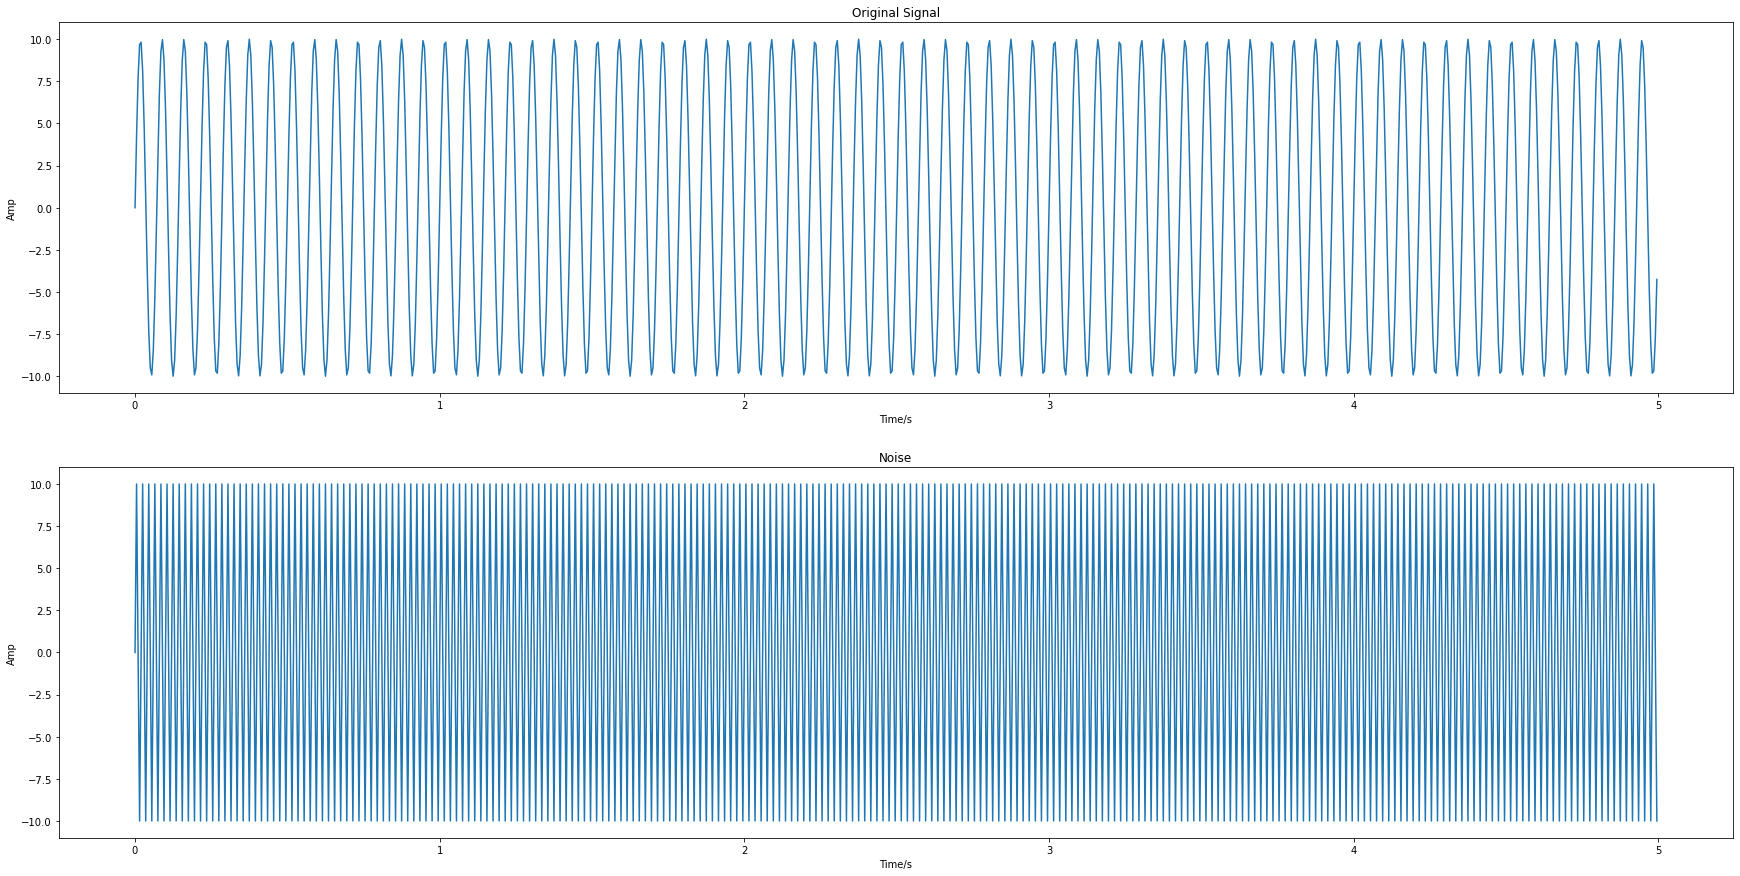

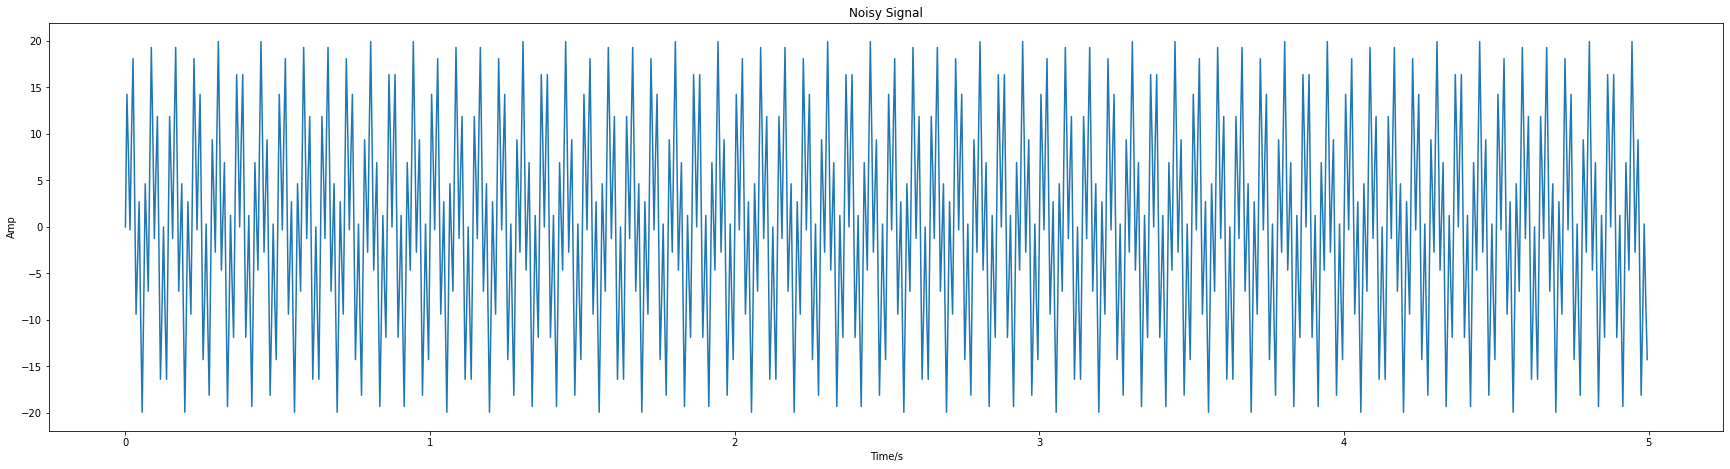

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,15))

time = np.arange(len(data['signal']))
time = time / data['sampling_freq_Hz']

ax1.plot(time, data['signal'])
ax1.set(
    xlabel = 'Time/s',
    ylabel = 'Amp',
    title = 'Original Signal'
)

ax2.plot(time, data['noise'])
ax2.set(
    xlabel = 'Time/s',
    ylabel = 'Amp', 
    title = 'Noise'
)

plt.show()

noisy_signal = data['signal'] + data['noise']
data['noisy_signal'] = noisy_signal

fig, ax = plt.subplots(figsize=(30, 7.5))

ax.plot(time, noisy_signal)
ax.set(
    xlabel = 'Time/s',
    ylabel = 'Amp',
    title = 'Noisy Signal',
)

plt.show()

## Fast Fourier Transform

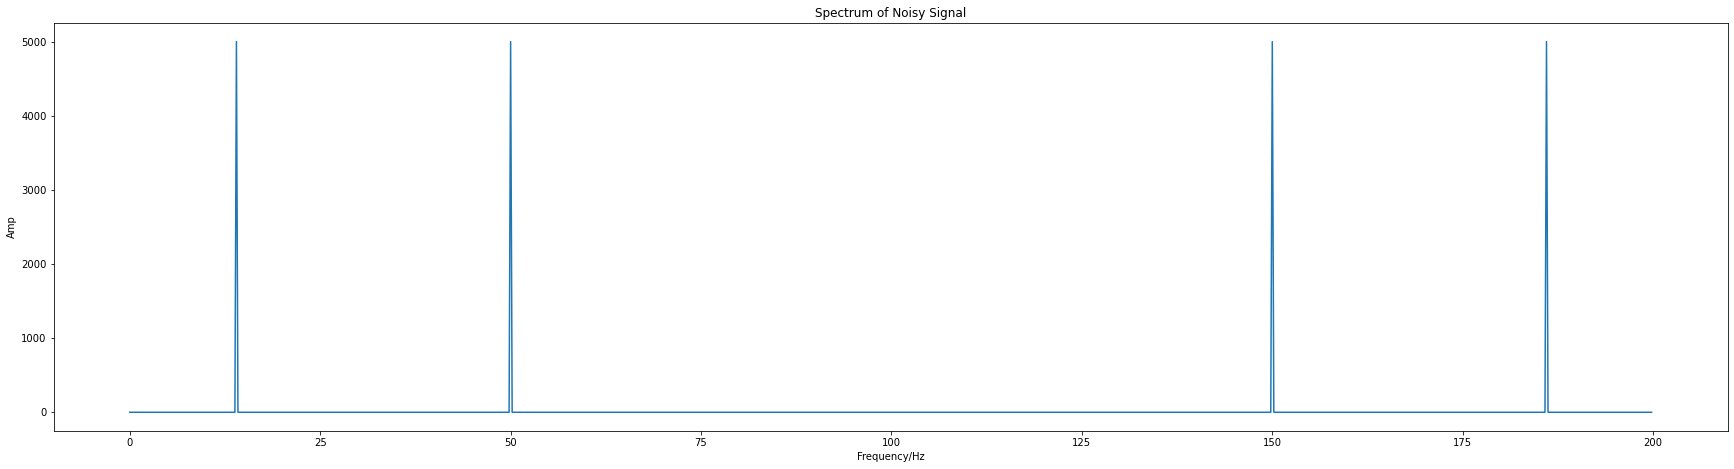

In [30]:
from scipy.fft import fft

frequency = np.arange(len(data['noisy_signal'])) * (data['sampling_freq_Hz'] / len(data['noisy_signal']))
spectrum = np.abs(fft(data['noisy_signal']))

fig, ax = plt.subplots(figsize=(30, 7.5))

ax.plot(frequency, spectrum)
ax.set(xlabel = 'Frequency/Hz',
      ylabel = 'Amp',
      title = 'Spectrum of Noisy Signal')

plt.show()
